<a href="https://colab.research.google.com/github/Takahiro0405/instagraph/blob/main/Youtube_Auto_Synced_Translated_Dubs_Colab_Version_no_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ative a placa T4 apenas se for usar Whisper ou converter o áudio com o vídeo

- de ativar a placa de vídeo do Google Colab
- até funciona com CPU, mas demora um pouquinho mais

## Como ativar?

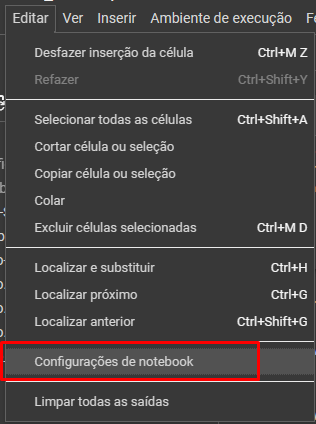

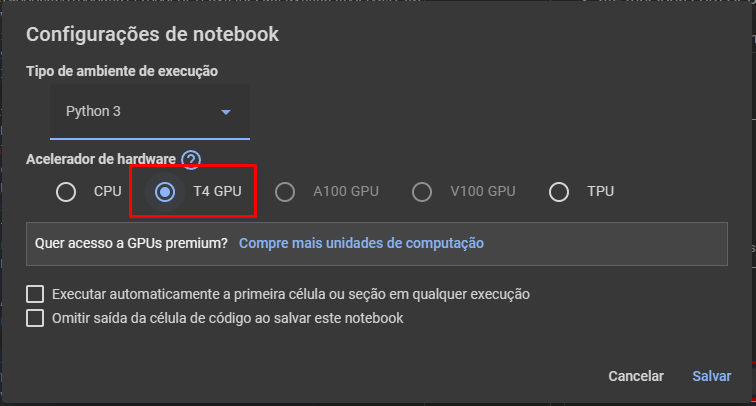


#Baixando vídeo do Youtube

In [1]:
#@title Instalar dependencias
!pip install pytube --quiet
!pip install moviepy --quiet
print('Finalizado!')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.7 MB/s eta 0:00:00
Finalizado!


In [2]:
#@title Baixar vídeo do Youtube
from pytube import YouTube
import os
from moviepy.editor import VideoFileClip

# URL do vídeo do YouTube que você deseja baixar
video_url = 'https://www.youtube.com/watch?v=ECoaXQ-9ehA' #@param{type: "string"}
# Crie uma instância do objeto YouTube com a URL do vídeo
yt = YouTube(video_url)

# Selecione a melhor qualidade disponível
video_stream = yt.streams.get_highest_resolution()

# Especifique o diretório de destino onde você deseja salvar o vídeo
output_path = '/content/'
os.makedirs(output_path, exist_ok=True)

# Baixe o vídeo e renomeie para 'video.mp4'
video_stream.download(output_path=output_path)
new_file_path = os.path.join(output_path, 'video.mp4')
old_file_path = os.path.join(output_path, video_stream.default_filename)
os.rename(old_file_path, new_file_path)

# Converta o vídeo em um arquivo de áudio (video.mp3)
video_clip = VideoFileClip(new_file_path)
audio_clip = video_clip.audio
audio_clip.write_audiofile(os.path.join(output_path, 'video.mp3'))

print('Download e conversão concluídos com sucesso!')


MoviePy - Writing audio in /content/video.mp3


MoviePy - Done.
Download e conversão concluídos com sucesso!


# Gerar legenda

In [3]:
#@title Instalar dependencias para o Whisper
!pip install -U stable-ts --quiet
!pip install -U git+https://github.com/jianfch/stable-ts.git --quiet
print('Finalizado')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.0/148.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 63.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Finalizado


In [4]:
#@title Fazer legenda automática
#@markdown Escolha o tipo, quanto maior, mais da VRAM do Google Colab é utilizado
from google.colab import files

# Substitua esta linha pelo caminho do seu arquivo de áudio
filename = '/content/video.mp3'

tipo = 'base' #@param ['tiny', 'base', 'small', 'medium', 'large']

import stable_whisper

# Carregar o modelo
model = stable_whisper.load_model(tipo)

# Realizar a transcrição
result = model.transcribe(filename)

# Converter o resultado em um arquivo de legenda com timestamps e segmentação em nível de palavra
result.to_srt_vtt(f'video.srt', segment_level=True, word_level=False)


100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 88.2MiB/s]
Transcribe:   0%|          | 0/1039.7 [00:02<?, ?sec/s]

Detected language: english


Transcribe: 100%|█████████▉| 1039.67/1039.7 [01:06<00:00, 15.63sec/s]


Saved: /content/video.srt


In [5]:
#@title Se você usou Whisper, use isso para criar backup da legenda no idioma original
import shutil

# Caminho para o arquivo original
caminho_original = '/content/video.srt'

# Caminho para o novo arquivo
caminho_novo = '/content/video-original.srt'

# Copia o arquivo original para o novo caminho
shutil.copy(caminho_original, caminho_novo)

# Verifica se o arquivo foi criado
if os.path.exists(caminho_novo):
    print(f"Arquivo {caminho_novo} criado com sucesso!")
else:
    print("Houve um erro ao criar o arquivo.")


Arquivo /content/video-original.srt criado com sucesso!


In [6]:
#@title Baixar legenda (Recomendado)
#@markdown Recomendado baixar a legenda e editar manualmente e deixar a voz no mesmo tempo da legenda, assim vai ter uma sincronia melhor
from google.colab import files

# Nome do arquivo de saída SRT
output_srt_file = 'video.srt'

# Baixe o arquivo SRT
files.download(output_srt_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Upar uma legenda
Caso tenha baixado a legenda e editado, você pode upar aqui novamente, se não, pule pro próximo passo

In [8]:
#@title Upar legenda
from google.colab import files
import os

# Faça o upload do arquivo de áudio
uploaded = files.upload()

# Verifique se o arquivo foi carregado com sucesso
for filename in uploaded.keys():
    print('Arquivo carregado:', filename)

    # Renomeie o arquivo para "legendas.srt"
    novo_nome = 'video.srt'
    os.rename(filename, novo_nome)

print(f'O arquivo foi renomeado para {novo_nome}')

KeyboardInterrupt: 

#Traduzir arquivo SRT | Google tradutor (Costuma ser bem literal)

In [9]:
#@title Dependencias para tradução
# Instale as bibliotecas googletrans e pysrt
!pip install googletrans==4.0.0-rc1 pysrt --quiet
print('Depedendencias instaladas, agora vai ser traduzido!!!')

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.4/104.4 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.0 MB/s eta 0:00:00
Depedendencias instaladas, agora vai ser traduzido!!!


In [10]:
#@title Traduzir
#@markdown Também recomendo uma tradução mais manual, ou até mesmo pelo chatGPT, pois esse tradutor do google disponivel para o Google Colab é pior que o site do Google tradutor mesmo

selecione_idioma_de_tradução = 'ja' #@param ['pt', 'es', 'en', 'hi', 'ar', 'ru', 'it', 'id', 'ja', 'ko', 'ko', 'zh', 'tr']

import googletrans
from googletrans import Translator
import pysrt

# Carregue o arquivo SRT
subs = pysrt.open('/content/video.srt')

# Crie um objeto tradutor
translator = Translator()

# Traduza cada legenda para o português do Brasil
for sub in subs:
    translation = translator.translate(sub.text, dest=f'{selecione_idioma_de_tradução}')
    sub.text = translation.text

# Salve o arquivo SRT traduzido
subs.save(f'/content/video-{selecione_idioma_de_tradução}.srt', encoding='utf-8')


# Fazer o TTS

In [11]:
#@title Instalar dependencias do TTS
!pip install azure-cognitiveservices-speech

!apt-get install mpv
!pip install pydub --quiet
print('Finalizado!')

/bin/bash: line 1: pipx: command not found
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libdvdnav4 libdvdread8 liblua5.2-0 libmujs1 libplacebo192 libsixel1 libva-wayland2 libvulkan1
  mesa-vulkan-drivers python3-brotli python3-certifi python3-mutagen python3-pycryptodome
  python3-pyxattr python3-websockets rtmpdump yt-dlp
Suggested packages:
  libdvdcss2 libcuda1 python-mutagen-doc python3-pyxattr-dbg python-pyxattr-doc libfribidi-bin
  | bidiv phantomjs
The following NEW packages will be installed:
  libdvdnav4 libdvdread8 liblua5.2-0 libmujs1 libplacebo192 libsixel1 libva-wayland2 libvulkan1
  mesa-vulkan-drivers mpv python3-brotli python3-certifi python3-mutagen python3-pycryptodome
  python3-pyxattr python3-websockets rtmpdump yt-dlp
0 upgraded, 18 newly installed, 0 to remove and 45 not upgraded.
Need to get 18.1 MB of archives.
After this operation, 78.1 MB of additional di

# Juntar e sincronizar TTS com legenda

In [30]:
import asyncio
import os
import re
from typing import Tuple

import azure.cognitiveservices.speech as speechsdk
from pydub import AudioSegment

# Azure Speech リソースの資格情報を設定します
speech_key = "a30ad98e2c46431cbc75a1cbfe9ecf83"  # Azure portal の Speech リソースのキーに置き換えます
service_region = "Japan East"  # Azure portal の Speech リソースのリージョンに置き換えます

# 入力 SRT ファイルと出力音声ファイルのパスを設定します
srt_file_path = "path/to/your/video.srt"
output_audio_file_path = "output.mp3"

# 使用する音声の名前を設定します。利用可能な音声のリストは、
# https://docs.microsoft.com/en-us/azure/cognitive-services/speech-service/language-support#text-to-speech
voice_name = "ja-JP-NaokiNeural"


##Dependencias

In [35]:
!pip install nest_asyncio
!pip install azure-cognitiveservices-speech
import asyncio
import nest_asyncio
!pip install --force-reinstall azure-c-shared
!apt-get update -y
!apt-get install -y libssl-dev libffi-dev python3-dev
nest_asyncio.apply()
async def synthesize_text_to_speech(text: str, output_file_path: str):
    """テキストを音声に変換し、音声ファイルを保存します。

    Args:
        text (str): 音声に変換するテキスト。
        output_file_path (str): 音声ファイルを保存するパス。
    """

    # Speech SDK を初期化します
    speech_config = speechsdk.SpeechConfig(subscription=speech_key, region=service_region)
    audio_config = speechsdk.audio.AudioOutputConfig(filename=output_file_path)

    # 音声合成装置を作成します
    speech_synthesizer = speechsdk.SpeechSynthesizer(speech_config=speech_config, audio_config=audio_config)

    # テキストを音声に変換します
    result = await speech_synthesizer.speak_text_async(text)

    # 結果を確認し、エラーを処理します
    if result.reason == speechsdk.ResultReason.SynthesizingAudioCompleted:
        print(f"音声は '{output_file_path}' に保存されました")
    elif result.reason == speechsdk.ResultReason.Canceled:
        cancellation_details = result.cancellation_details
        print(f"音声合成はキャンセルされました: {cancellation_details.reason}")
        if cancellation_details.reason == speechsdk.CancellationReason.Error:
            print(f"エラーの詳細: {cancellation_details.error_details}")

srt_file = "video-ja.srt"
# SRT ファイルからタイムスタンプとテキストを抽出する関数
def extract_timestamp_and_text_from_srt(srt_file: str):
    """SRT ファイルからタイムスタンプとテキストを抽出します。

    Args:
        srt_file_path (str): SRT ファイルのパス。

    Returns:
        list: (開始時刻（ミリ秒）、終了時刻（ミリ秒）、テキスト) のタプルのリスト。
    """

    with open(srt_file, "r", encoding="utf-8") as f:
        srt_content = f.read()

    timestamp_text_pairs = []
    for subtitle in srt_content.split("\n\n"):
        if subtitle:
            lines = subtitle.strip().split("\n")
            if len(lines) >= 3:
                timestamp_line = lines[1]
                text = " ".join(lines[2:])

                start_time_str, end_time_str = timestamp_line.split(" --> ")
                start_time_ms = convert_srt_timestamp_to_milliseconds(start_time_str)
                end_time_ms = convert_srt_timestamp_to_milliseconds(end_time_str)

                timestamp_text_pairs.append((start_time_ms, end_time_ms, text))

    return timestamp_text_pairs

# SRT タイムスタンプをミリ秒に変換する関数
def convert_srt_timestamp_to_milliseconds(srt_timestamp: str) -> int:
    """SRT タイムスタンプをミリ秒に変換します。

    Args:
        srt_timestamp (str): SRT タイムスタンプ (例: 00:00:01,234)。

    Returns:
        int: ミリ秒単位のタイムスタンプ。
    """

    hours, minutes, seconds_milliseconds = srt_timestamp.split(":")
    seconds, milliseconds = seconds_milliseconds.split(",")
    total_milliseconds = (
        int(hours) * 3600000
        + int(minutes) * 60000
        + int(seconds) * 1000
        + int(milliseconds)
    )
    return total_milliseconds

# メイン関数
async def main():
    """メイン関数。"""

    # SRT ファイルからタイムスタンプとテキストを抽出します
    timestamp_text_pairs = extract_timestamp_and_text_from_srt(srt_file)

    # 音声ファイルを保存するディレクトリを作成します
    output_dir = "tts_output"
    os.makedirs(output_dir, exist_ok=True)

    # 各テキストセグメントを音声に変換し、保存します
    tasks = []
    for i, (start_time_ms, end_time_ms, text) in enumerate(timestamp_text_pairs):
        output_file_path = os.path.join(output_dir, f"{i:04d}.mp3")
        task = asyncio.create_task(synthesize_text_to_speech(text, output_file_path))
        tasks.append(task)

    # すべての音声合成タスクが完了するのを待ちます
    await asyncio.gather(*tasks)

    # 音声ファイルを連結します
    combined_audio = AudioSegment.empty()
    for i, (start_time_ms, end_time_ms, text) in enumerate(timestamp_text_pairs):
        audio_segment = AudioSegment.from_mp3(os.path.join(output_dir, f"{i:04d}.mp3"))
        silence_duration = start_time_ms - len(combined_audio)
        if silence_duration > 0:
            combined_audio += AudioSegment.silent(duration=silence_duration)
        combined_audio += audio_segment

    # 連結された音声ファイルを保存します
    combined_audio.export(output_audio_file_path, format="mp3")

    print(f"音声は '{output_audio_file_path}' に保存されました")

# スクリプトが直接実行された場合、メイン関数を呼び出します
if __name__ == "__main__":


    await main()

ERROR: Could not find a version that satisfies the requirement azure-c-shared (from versions: none)
ERROR: No matching distribution found for azure-c-shared
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state i

  super().__init__(loop=loop)



RuntimeError: Exception with error code: 
[CALL STACK BEGIN]

/usr/local/lib/python3.10/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x1e3f11) [0x7a1c3f9e3f11]
/usr/local/lib/python3.10/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x20d2e7) [0x7a1c3fa0d2e7]
/lib/x86_64-linux-gnu/libc.so.6(+0x99ee8) [0x7a1dd6ad6ee8]
/usr/local/lib/python3.10/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x20e41c) [0x7a1c3fa0e41c]
/usr/local/lib/python3.10/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x1b445f) [0x7a1c3f9b445f]
/usr/local/lib/python3.10/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x1b3d15) [0x7a1c3f9b3d15]
/usr/local/lib/python3.10/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x1eaca5) [0x7a1c3f9eaca5]
/usr/local/lib/python3.10/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x1dbdc0) [0x7a1c3f9dbdc0]
/usr/local/lib/python3.10/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x1d5d8e) [0x7a1c3f9d5d8e]
/usr/local/lib/python3.10/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0xdc8bd) [0x7a1c3f8dc8bd]
/usr/local/lib/python3.10/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x1eaca5) [0x7a1c3f9eaca5]
/usr/local/lib/python3.10/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x1ccb4f) [0x7a1c3f9ccb4f]
/usr/local/lib/python3.10/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(+0x21b9a6) [0x7a1c3fa1b9a6]
/usr/local/lib/python3.10/dist-packages/azure/cognitiveservices/speech/libMicrosoft.CognitiveServices.Speech.core.so(synthesizer_create_speech_synthesizer_from_config+0xf3) [0x7a1c3f8bf169]
/lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7a1dd5ee8e2e]
/lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7a1dd5ee5493]
/usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7a1dd5f0e3e9]
[CALL STACK END]

Runtime error: Failed to initialize platform (azure-c-shared). Error: 2176

In [ ]:
#@title Clonar repositório e instalar dependencias
!git clone https://github.com/ThioJoe/Auto-Synced-Translated-Dubs
%cd Auto-Synced-Translated-Dubs
!pip install -r requirements.txt --quiet
print('Finalizado')

Cloning into 'Auto-Synced-Translated-Dubs'...
remote: Enumerating objects: 547, done.
remote: Counting objects: 100% (369/369), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 547 (delta 285), reused 311 (delta 234), pack-reused 178
Receiving objects: 100% (547/547), 273.21 KiB | 13.66 MiB/s, done.
Resolving deltas: 100% (363/363), done.
/content/Auto-Synced-Translated-Dubs
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.0 MB/s eta 0:00:00
Finalizado


In [ ]:
#@title Mover a pasta de TTS gerado no passo anterior para o local indicado
import os
import shutil

# Diretório de origem (pasta "TTS")
source_dir = '/content/TTS'

# Diretório de destino (pasta "content/Auto-Synced-Translated-Dubs")
destination_dir = '/content/Auto-Synced-Translated-Dubs'

# Verifica se a pasta de origem existe
if os.path.exists(source_dir):
    # Renomeia a pasta de origem para "workingFolder"
    os.rename(source_dir, '/content/workingFolder')

    # Verifica se o diretório de destino existe
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # Move a pasta renomeada para o diretório de destino
    shutil.move('/content/workingFolder', destination_dir)
    print(f"A pasta 'TTS' foi renomeada para 'workingFolder' e movida para '{destination_dir}'.")
else:
    print("A pasta 'TTS' não existe.")



A pasta 'TTS' foi renomeada para 'workingFolder' e movida para '/content/Auto-Synced-Translated-Dubs'.


In [ ]:
#@title Modificando arquivos do repositorio original para rodar no Google COLAB
!wget https://huggingface.co/RafaG/Tests/resolve/main/main.py -O /content/Auto-Synced-Translated-Dubs/main.py
!wget https://huggingface.co/RafaG/Tests/resolve/main/batch.ini -O /content/Auto-Synced-Translated-Dubs/batch.ini
!wget https://huggingface.co/RafaG/Tests/resolve/main/config.ini -O /content/Auto-Synced-Translated-Dubs/config.ini
!wget https://huggingface.co/RafaG/Tests/resolve/main/winsound.py -O /content/Auto-Synced-Translated-Dubs/winsound.py
!wget https://huggingface.co/RafaG/Tests/resolve/main/cloud_service_settings.ini -O /content/Auto-Synced-Translated-Dubs/cloud_service_settings.ini

--2023-10-25 15:10:30--  https://huggingface.co/RafaG/Tests/resolve/main/main.py
Resolving huggingface.co (huggingface.co)... 18.154.227.7, 18.154.227.69, 18.154.227.87, ...
Connecting to huggingface.co (huggingface.co)|18.154.227.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15260 (15K) [text/plain]
Saving to: ‘/content/Auto-Synced-Translated-Dubs/main.py’

/content/Auto-Synce 100%[===================>]  14.90K  --.-KB/s    in 0s      

2023-10-25 15:10:30 (234 MB/s) - ‘/content/Auto-Synced-Translated-Dubs/main.py’ saved [15260/15260]

--2023-10-25 15:10:30--  https://huggingface.co/RafaG/Tests/resolve/main/batch.ini
Resolving huggingface.co (huggingface.co)... 18.154.227.7, 18.154.227.69, 18.154.227.87, ...
Connecting to huggingface.co (huggingface.co)|18.154.227.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4028 (3.9K) [text/plain]
Saving to: ‘/content/Auto-Synced-Translated-Dubs/batch.ini’

/content/Auto-Synce 100%[=======

In [ ]:
#@title Colocando legendas e vídeo no local correto
import shutil
import os

# Defina os caminhos de origem e destino
srt_source_path = "/content/video.srt"
srt_dest_path = "/content/Auto-Synced-Translated-Dubs/subtitles.srt"
subtitles_source_path = "/content/Auto-Synced-Translated-Dubs/subtitles.srt"
subtitles_dest_path = "/content/Auto-Synced-Translated-Dubs/output/video/subtitles.srt"
video_source_path = "/content/video.mp4"
video_dest_path = "/content/Auto-Synced-Translated-Dubs/video.mp4"

# Copie e mova o arquivo de srt
shutil.copy(srt_source_path, srt_dest_path)

# Copie e mova o arquivo de subtitles
if not os.path.exists("/content/Auto-Synced-Translated-Dubs/output/video/"):
    os.makedirs("/content/Auto-Synced-Translated-Dubs/output/video/")
shutil.copy(subtitles_source_path, subtitles_dest_path)

# Copie e mova o arquivo de vídeo
shutil.copy(video_source_path, video_dest_path)


'/content/Auto-Synced-Translated-Dubs/video.mp4'

## Configurações opcionais

In [ ]:
#@title Configuração
# Caminho para o arquivo config.ini
config_file_path = '/content/Auto-Synced-Translated-Dubs/config.ini'

Buffer = 25  # @param {type: "slider", min: 0, max: 50}
Combine = 200  # @param {type: "slider", min: -1, max: 500}
Formato = 'aac'  # @param ['aac', 'mp3', 'wav']
Original_Language = 'pt-BR'  # @param ['pt-BR', 'en-US', 'es-MX', 'hi-IN', 'ru-RU', 'ar-EG', 'it-IT', 'id-ID', 'ja-JP', 'ko-KR', 'zh-CN', 'tr-TR']
Sample_Rate = "24000"  # @param ['48000', '44100', '32000', '24000']
# Função para editar as configurações no arquivo config.ini
def editar_config(config_path, new_add_line_buffer_milliseconds, new_combine_subtitles_max_chars, new_output_format, new_original_language, new_synth_sample_rate, force_stretch_with_twopass):
    with open(config_path, 'r') as f:
        lines = f.readlines()

    with open(config_path, 'w') as f:
        for line in lines:
            if line.startswith("add_line_buffer_milliseconds"):
                f.write(f'add_line_buffer_milliseconds = {new_add_line_buffer_milliseconds}\n')
            elif line.startswith("combine_subtitles_max_chars"):
                f.write(f'combine_subtitles_max_chars = {new_combine_subtitles_max_chars}\n')
            elif line.startswith("output_format"):
                f.write(f'output_format = {new_output_format}\n')
            elif line.startswith("original_language"):
                f.write(f'original_language = {new_original_language}\n')
            elif line.startswith("synth_sample_rate"):
                f.write(f'synth_sample_rate = {new_synth_sample_rate}\n')
            elif line.startswith("force_stretch_with_twopass"):
                f.write(f'force_stretch_with_twopass =  {new_force_stretch_with_twopass}\n')
            else:
                f.write(line)

# Solicite ao usuário os novos valores
new_add_line_buffer_milliseconds = f'{Buffer}'
new_combine_subtitles_max_chars = f'{Combine}'
new_output_format = f'{Formato}'
new_original_language = f'{Original_Language}'
new_synth_sample_rate = f'{Sample_Rate}'
new_force_stretch_with_twopass = True

# Chame a função para editar as configurações no arquivo config.ini
editar_config(config_file_path, new_add_line_buffer_milliseconds, new_combine_subtitles_max_chars, new_output_format, new_original_language, new_synth_sample_rate, new_force_stretch_with_twopass)

print("Valores atualizados com sucesso no arquivo config.ini.")


Valores atualizados com sucesso no arquivo config.ini.


In [ ]:
#@title Idioma final

number = "5"  # @param {type: "string"}

#@markdown 0- Inglês <br> 1- Espanhol <br> 2- Hindi <br> 3- Árabe <br> 4- Russo <br> 5- Português Brasil <br> 6- Italiano <br> 7- Indonésio <br> 8- Japones <br> 9- Coreano <br> 10- Alemão <br> 11- Chines <br> 12- Turco

# Caminho para o arquivo batch.ini
file_path = '/content/Auto-Synced-Translated-Dubs/batch.ini'

# Abra o arquivo em modo de leitura
with open(file_path, 'r') as file:
    lines = file.readlines()

# Encontre a linha que contém "enabled_languages = 5"
target_line = None
for i, line in enumerate(lines):
    if line.startswith('enabled_languages = '):
        target_line = i
        break

# Se a linha for encontrada, permita ao usuário editar os valores
if target_line is not None:
    new_values = f'{number}'
    lines[target_line] = f'enabled_languages = {new_values}\n'

    # Abra o arquivo em modo de escrita para atualizar
    with open(file_path, 'w') as file:
        file.writelines(lines)
    print("Valores atualizados com sucesso.")
else:
    print("Linha 'enabled_languages = 5' não encontrada no arquivo.")


Valores atualizados com sucesso.


In [ ]:
#@title A Mágica
!python main.py

------- 'Auto Synced Translated Dubs' script by ThioJoe - Release version 0.15.0 -------

----- Beginning Processing of Languages -----

----- Beginning Processing of Language (1/1): pt-BR -----
Original language is the same as the target language. Skipping translation.
                                               
 Trimmed Audio: 180 of 180

 Final Audio Processed: 180 of 180


Exporting audio file...


In [ ]:
#@title Reproduzir Áudio gerado (Aqui é apenas pra escutar o resultado, pois ele está em MP3, pra baixar use outra célula)
import os
from pydub import AudioSegment
from IPython.display import Audio

# Verifique se o diretório de entrada existe
input_dir = "/content/Auto-Synced-Translated-Dubs/Outputs/video"
if not os.path.exists(input_dir):
    print("O diretório de entrada não existe.")
else:
    # Crie o diretório de saída se não existir
    output_dir = "/content/Auto-Synced-Translated-Dubs/Outputs/converted_audio"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Liste todos os arquivos .aac na pasta de entrada
    aac_files = [f for f in os.listdir(input_dir) if f.endswith(".aac")]

    if not aac_files:
        print("Não foram encontrados arquivos .aac na pasta de entrada.")
    else:
        for aac_file in aac_files:
            # Defina o caminho de entrada e saída para o arquivo atual
            input_path = os.path.join(input_dir, aac_file)
            output_file = os.path.splitext(aac_file)[0] + ".mp3"
            output_path = os.path.join(output_dir, output_file)

            # Converte o arquivo .aac para .mp3
            audio = AudioSegment.from_file(input_path, format="aac")
            audio.export(output_path, format="mp3")

            # Exiba o arquivo de saída no console
            print(f"Arquivo de saída: {output_file}")
            display(Audio(filename=output_path))


Arquivo de saída: video - Portuguese - pt-BR.mp3


# Adicionar áudio novo no vídeo

In [ ]:
#@title Por o áudio no vídeo

from moviepy.editor import VideoFileClip
from moviepy.editor import AudioFileClip

# Caminho para o arquivo de áudio
audio_file_path = "/content/Auto-Synced-Translated-Dubs/Outputs/converted_audio/video - Portuguese - pt-BR.mp3"

# Caminho para o arquivo de vídeo
video_file_path = "/content/video.mp4"

# Carregar o arquivo de vídeo
video_clip = VideoFileClip(video_file_path)

# Carregar o arquivo de áudio
audio_clip = AudioFileClip(audio_file_path)

# Substituir o áudio original do vídeo pelo novo áudio
video_clip = video_clip.set_audio(audio_clip)

# Salvar o vídeo com o novo áudio
output_file_path = "/content/video_com_novo_audio.mp4"
video_clip.write_videofile(output_file_path, codec='libx264')

# Fechar os objetos de vídeo e áudio
video_clip.close()
audio_clip.close()


Moviepy - Building video /content/video_com_novo_audio.mp4.
MoviePy - Writing audio in video_com_novo_audioTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/video_com_novo_audio.mp4



t: 100%|██████████| 27400/27400 [21:05<00:00, 26.36it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/video.mp4, 2764800 bytes wanted but 0 bytes read,at frame 27399/27400, at time 914.21/914.22 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready /content/video_com_novo_audio.mp4


In [ ]:
#@title Baixar vídeo com o novo áudio
from google.colab import files

# Substitua 'nome_do_arquivo_no_colab' pelo nome do arquivo no ambiente Colab
files.download('/content/video_com_novo_audio.mp4')
print('Se quiser baixar mais rápido, mande para seu Google Drive e baixe por lá \n\nQuando a barra tiver cheia, vai começar a baixar (Limitação do Google Colab)\n')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se quiser baixar mais rápido, mande para seu Google Drive e baixe por lá 

Quando a barra tiver cheia, vai começar a baixar (Limitação do Google Colab)



#Créditos
Agradecimentos à<br>
[rany2](https://github.com/rany2) pelo [edge-tts](https://github.com/rany2/edge-tts/tree/master)<br>
[ThioJoe](https://github.com/ThioJoe) pelo [Auto-Synced-Translated-Dubs](https://github.com/ThioJoe/Auto-Synced-Translated-Dubs) e seu [vídeo](https://www.youtube.com/watch?v=uaHmtJrZRdM&t=50s)

---
![Rafa.png](https://i.imgur.com/cGknQpU.png;base64)

Colab por **Rafa.Godoy**<br>
[Github](https://github.com/RafaelGodoyEbert)<br>
[Instagram](https://www.instagram.com/rafael.godoy.ebert/)<br>
[Twitter / X](https://twitter.com/GodoyEbert)
<br>

# DEV

In [ ]:
##Limpar pasta TTS
!rm -r /content/TTS
#!rm -r TTS_new
#!rm -r TTS_WAV
#!rm -r /content/Auto-Synced-Translated-Dubs/workingFolder
#!rm -r TTS.zip

In [ ]:
##Contar quantos arquivos tem na pasta
import os

# Diretório onde os arquivos estão
diretorio = '/content/TTS'

# Lista todos os arquivos no diretório
arquivos = os.listdir(diretorio)

# Conta a quantidade de arquivos
quantidade_arquivos = len(arquivos)

print(f'A pasta TTS contém {quantidade_arquivos} arquivos.')


A pasta TTS contém 180 arquivos.
